<a href="https://colab.research.google.com/github/paira85/AI_smaple/blob/main/%EC%A0%84%EB%B3%B5%EC%88%9C%EC%82%B4%EB%AC%B4%EA%B2%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      4177 non-null   float64
 1   직경      4177 non-null   float64
 2   두께      4177 non-null   float64
 3   전체무게    4177 non-null   float64
 4   내장무게    4177 non-null   float64
 5   껍질무게    4177 non-null   float64
 6   나이테     4177 non-null   int64  
 7   순살무게    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB
None
      길이     직경     두께    전체무게    내장무게   껍질무게  나이테    순살무게
0  0.455  0.365  0.095  0.5140  0.1010  0.150   15  0.2245
1  0.350  0.265  0.090  0.2255  0.0485  0.070    7  0.0995
2  0.530  0.420  0.135  0.6770  0.1415  0.210    9  0.2565
3  0.440  0.365  0.125  0.5160  0.1140  0.155   10  0.2155
4  0.330  0.255  0.080  0.2050  0.0395  0.055    7  0.0895
[[ 0.455   0.365   0.095  ...  0.101   0.15   15.    ]
 [ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 

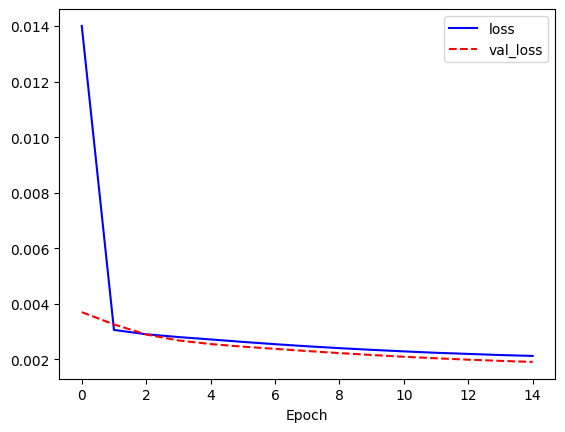

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0019     


[0.0019684077706187963, 0.0]

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#초기화
seed = 0
np.random.seed(seed)

#https://samyangm.com/shop/bbs/board.php?bo_table=shop_data

#전복 빅데이터 4177개 여덟 가지 속성
#1: 길이     2 직경   3   두께  4   전체무게  5  내장무게 6  껍질무게  7 나이테  8  순살무게
url= 'https://drive.google.com/uc?export=download&id=1Oh2P40wblgjgJAA4659snz0mlURf2YIO'

#url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv'
#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df = pd.read_csv(url, delimiter=",")
print(df.info())
print(df.head())

dataset = df.values
#행과 열의 전체데이터
X = dataset[0:4177 , 0:7].astype(float)

#행과 7번째 열의 데이터
Y = dataset[:,7]

print(X)
print('-------------')
print(Y)

########################## 머신러닝 세팅 ##########################
#사이킷런 sklearn
#훈련데이터 + 테스트 데이터 분할하기
from sklearn.model_selection import train_test_split
# x, y 데이터를 7은 훈련데이터, 3은 테스트 데이터로 분할,
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#머신러닝 - 지도 학습 - 회귀 인공지능 모델
#선형 회귀 모듈
from sklearn.linear_model import LinearRegression
#절편이 있는 선을 사요하기 위해 fit_intercept사용
in_reg = LinearRegression(fit_intercept=True)

########################## 모델학습 ##########################
#알고리즘 저장 - 학습
model = in_reg.fit(X_train, Y_train)

#머신러닝의 정확도를 0과1사이로 표현해주는 R2를 출력해준다.
#r2= r squeared, 결정계수 = 1에 가까울수록 성능이 우수하다.
#정확도를 표현한 회구 평가지표중하나
print()
print('정확도 r^2 = ' , model.score(X_train , Y_train))
print()

#독릭변수마다 기울기가 있고 절편이 존재하는 하나의 회귀선을 만들었다.
#인공지능에서는 기울기를 가중치(Weight), 절편을 편향(Bias)

#가중치와 편향 확인하기
w= model.coef_
b= model.intercept_
print('가중치 : ', w)
print('편향 : ', b)
print()
#계산식 확인하기
#전복 순살무게 =  (0.13216544 * 길이) + (0.07453926 * 직경) + (0.03037804 * 두꼐)+  (0.69165655*전체무게)+ (-0.41884668*내장무게)+ (-0.68525444*껍데기무게)) +(-0.00646454*나이트) + (-0.014075705572578923  편향)

legth = 0.350
diameter = 0.265
height = 0.090
whole = 0.2255
viscera = 0.0485
shell =  0.070
rings = 7
shucked = (0.13216544 * legth) + (0.07453926 * diameter) + (0.03037804 * height)+  (0.69165655*whole)+ (-0.41884668*viscera)+ (-0.68525444*shell) +(-0.00646454*rings) + (-0.014075705572578923  )

print(shucked)

legth1 = 0.330
diameter1 = 0.255
height1 = 0.080
whole1 = 0.2050
viscera1 = 0.0395
shell1 =  0.055
rings1 = 7
shucked1 = (0.13216544 * legth1) + (0.07453926 * diameter1) + (0.03037804 * height1)+  (0.69165655 * whole1) - (0.41884668 * viscera1) - (0.68525444 * shell1) + (-0.00646454 * rings1) - (0.014075705572578923 )

print(shucked1)


########################## 모델테스트 ##########################
#Y_prediction 결과는 2차원 배열인데 flatten함수를 사용해서 1차원으로 변경
Y_prediction = model.predict(X_test).flatten()

for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print('실제 살무게  : {:.3f}, 학습예측살무게 : {:.3f}'.format(label, prediction))


########################## 딥러닝 세팅 ##########################
#딥러닝 = 케라스 keras 텐서플로 tensorflow

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

#Sequential 함수는 딥러닝 모델 층을 만들어 주고 add() 함수로 몇 층을 할 것인지 설정한다.

#입력층1개, 은닉층,1개 출력층 1개, 총3개의 층으로 모델을 구성하고 dense()함수로 세부 설정한다.
#입력층을 설정할 때만 속성의 개수가 몇 개인지 넣어야 한다, input_dim=7
#28 ,7 , 1개는 퍼셉트론(인공신경세포) 개수이다.
#활성화 함수는 출력층을 제외하고 relu 함수로 한다.
#마지막 출력층은 전복 순살 무게 수치가 나오야 하므로 퍼셉트론이 1개이다.
Seqientisl_model = Sequential()
Seqientisl_model.add(Dense(28, input_dim=7, activation='relu'))
Seqientisl_model.add(Dense(7, activation='relu'))
Seqientisl_model.add(Dense(1))


#컴파일
#오차 = 최소제곱법 (mean squared error )
#경사하강법 =  adam
#최적화 = optimizer
#수행 = performance
#정확도 = accuracy
Seqientisl_model.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy'])

#컴파일 이후 학습시키기
#X_train, Y_train 학습
#epochs = 학습횟수
#batch_size = 소그룹 지정, 2000개가 넘는 데이터를 한 번에 학습 할 수 없어 batch_size 나누어 학습을 진행한다,
#validataion_split =  모델 기능 향상을 위해 일종의 모의시험
#validataion_split = 검증 데이터의 비율 설정 부분
history = Seqientisl_model.fit(X_train, Y_train, epochs=15, batch_size=10, validation_split=0.25)

#평균제고옵차(loss)가 2.3g이고, 검증 데이터 평균제곱오차(var_loss)는 2g으로 매우 높은 정확도를 보여 준다.
#loss(평균제곱오차)는 얼마나 차이가 나는지 평균을 구하고,
#accuracy(정확도)는 맞은 경우를 전체로 나눈 값이다.
#회귀 딥러닝 모델은 오차(loss)만 평가 지표로 활용할 수 있다.


#학습은 일정 수즌 이상 학습이 이루어지면 오차가 비슷해진다.
#학습을 하더라도 더 이상 오차가 줄어들지 않고 오히려 훈련데이터에만 너무 최적화 되어, 테스트 데이터나 다른 외부 데이터를 예측했을때 정확도가 떨어지는 경우가 있다.
#"과적합(Overfitting)" 이라고한다. 그래서 적당한 학습 횟수를 찾는 것이 중요하다.

plt.plot(history.history['loss'], 'b-' , label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#테스트데이터
#evaluate() 테스트 데이터를 넣어 새로운 데이터로 예측했을 때 오차를 확인할 수 있다.
Seqientisl_model.evaluate(X_test,Y_test)